In [1]:
# dose images 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from pyarrow import parquet 
import numpy as np
import sys 
sys.path.append('/home/bekah/gPhoton2')
from gPhoton.pipeline import execute_pipeline
from astropy.io import fits
import os 

In [2]:
def centile_clip(image, centiles=(0, 99)):
    """
    simple clipping function that clips values above and below a given
    percentile range
    """
    import numpy as np
    finite = np.ma.masked_invalid(image)
    bounds = np.percentile(finite[~finite.mask].data, centiles)
    result = np.ma.clip(finite, *bounds)

    if isinstance(image, np.ma.MaskedArray):
        return result

    return result.data

In [5]:
fuv = fits.open("/media/bekah/BekahA/backplanes/e01734/e01734-fd-b00-f2000-t00000-g_dose.fits.gz")

In [6]:
fuv

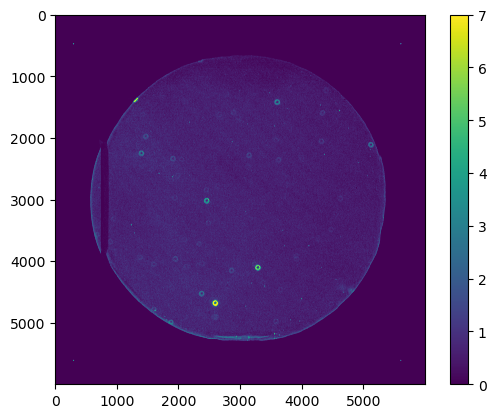

In [15]:
plt.imshow(centile_clip(fuv[0].data*3.5, (0,99.5)))
plt.colorbar()

In [8]:
nuv = fits.open("/media/bekah/BekahA/backplanes/e01734/e01734-nd-b00-f2000-t00000-g_dose.fits.gz")

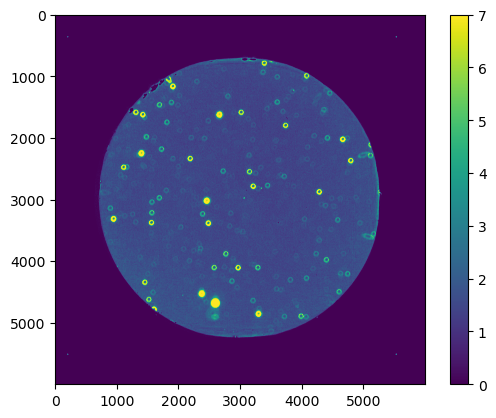

In [13]:
plt.imshow(centile_clip(nuv[0].data, (0,99.5)))
plt.colorbar()

In [11]:
nuv[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6000                                                  
NAXIS2  =                 6000                                                  
BAND    =                    1                                                  

In [12]:
fuv[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6000                                                  
NAXIS2  =                 6000                                                  
BAND    =                    2                                                  

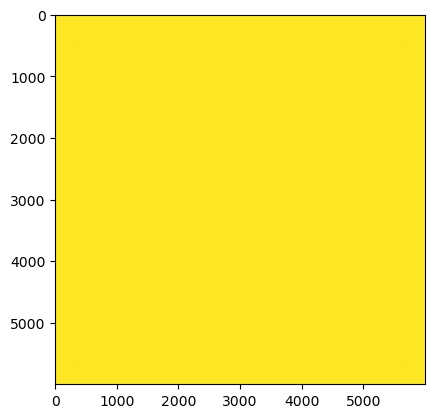

In [20]:
plt.imshow(centile_clip(nuv[0].data-fuv[0].data*3.5))


In [22]:
fuv_parq = parquet.read_table("/media/bekah/BekahA/backplanes/e01734/e01734-fd-b00.parquet")

In [23]:
fuv_parq

pyarrow.Table
t: double
xb: int16
xamc: int16
yb: int16
yamc: int16
q: int16
xa: int16
ya: int16
x: float
y: float
xi: float
eta: float
col: float
row: float
flags: uint8
ra: double
dec: double
detrad: float
mask: bool
flat: float
scale: float
response: float
----
t: [[745828291.995,745828291.995,745828291.995,745828291.995,745828291.995,...,745828342.24,745828342.24,745828342.24,745828342.24,745828342.24],[745828342.24,745828342.24,745828342.24,745828342.24,745828342.24,...,745828392.965,745828392.965,745828392.965,745828392.965,745828392.965],...,[745829586.305,745829586.305,745829586.305,745829586.31,745829586.31,...,745829635.79,745829635.79,745829635.795,745829635.795,745829635.795],[745829635.795,745829635.795,745829635.795,745829635.795,745829635.795,...,745829680.99,745829680.99,745829680.99,745829680.99,745829680.99]]
xb: [[2,5,5,5,4,...,3,6,5,2,3],[4,4,4,3,5,...,4,4,3,3,1],...,[4,3,3,2,2,...,2,3,3,5,5],[3,4,5,4,6,...,3,2,3,5,3]]
xamc: [[412,-112,-666,-152,1311,...,-601,-1402,